# Regression using scikit-learn

<a id="load_libraries"></a>
## Load libraries

In [5]:
!pip install -U scikit-learn
!pip install pandas==0.24.2
!pip install --user pandas_ml==0.6.1
!pip install matplotlib==3.1.0

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Requirement already up-to-date: scikit-learn in /opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages (0.24.2)
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils impor

In [6]:
import pandas as pd, numpy as np
import sys
import io

<a id="load_data"></a>
## Load data

In [9]:
# Place cursor below and insert the Pandas DataFrame for the Insurance Expense data
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_7f9f223fb97c47b1825f74f69691ee01 = 'https://s3.ap-geo.objectstorage.softlayer.net'
else:
    endpoint_7f9f223fb97c47b1825f74f69691ee01 = 'https://s3.ap-geo.objectstorage.service.networklayer.com'

client_7f9f223fb97c47b1825f74f69691ee01 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='9kL9FeL6AA8jD4h62vexXBPE0D15i4H6I-EgkuJkzcRb',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_7f9f223fb97c47b1825f74f69691ee01)

body = client_7f9f223fb97c47b1825f74f69691ee01.get_object(Bucket='jumpstartyourjourney-donotdelete-pr-uxuydsi0s4ynks',Key='insurance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_data_3.head()


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### Update the variable for our Pandas dataframe

In [10]:
df_pd = df_data_3

<a id="prepare_data"></a>
## Prepare data for building regression model

### Explore data

In [11]:
print("The dataset contains columns of the following data types : \n" +str(df_pd.dtypes))

The dataset contains columns of the following data types : 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object


In [12]:
print("The dataset contains following number of records for each of the columns : \n" +str(df_pd.count()))

The dataset contains following number of records for each of the columns : 
age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
expenses    1338
dtype: int64


In [13]:
df_pd.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

### Prepare categorical columns

In [14]:
# Defining the categorical columns 
categoricalColumns = df_pd.select_dtypes(include=[np.object]).columns

print("Categorical columns : " )
print(categoricalColumns)

Categorical columns : 
Index(['sex', 'smoker', 'region'], dtype='object')


Categories needed to be indexed, which means the string labels are converted to indices or numbers. These label indices are encoded using One-hot encoding to a binary vector with at most a single one-value indicating the presence of a specific feature value from among the set of all feature values. This encoding allows algorithms which expect continuous features to use categorical features. We use the **OneHotEncoder** method from the *sklearn.preprocessing* library to implement this. 

In [15]:
from sklearn.preprocessing import OneHotEncoder

onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

We use the *SimpleImputer* method as an imputation transformer for completing missing values. Note that since this dataset has no missing values it will not have an impact for this example. We however show this to explain how values can be imputed using sklearn.

In [16]:
from sklearn.impute import SimpleImputer

impute_categorical = SimpleImputer(strategy="most_frequent")

scikit-learn offers an API to sequentially apply a list of transforms and a final estimator - *sklearn.pipeline.Pipeline*. We create a pipeline and assemble the transformations we intend to apply on the categorical columns as shown below. 

In [17]:
from sklearn.pipeline import Pipeline

categorical_transformer = Pipeline(steps=[('impute',impute_categorical),('onehot',onehot_categorical)])

Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. We define a *ColumnTransformer* and pass the pipeline we create in the cell above along with the column list we defined as well. 

In [18]:
from sklearn.compose import ColumnTransformer

preprocessorForCategoricalColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns)],
                                            remainder="passthrough")

The transformation happens in the pipeline. We explicitly run the cell below to show what intermediate value looks like

In [19]:
df_pd_temp = preprocessorForCategoricalColumns.fit_transform(df_pd)
print("Categorical Data after transforming :")
print(df_pd_temp)

Categorical Data after transforming :
[[1.000000e+00 0.000000e+00 0.000000e+00 ... 2.790000e+01 0.000000e+00
  1.688492e+04]
 [0.000000e+00 1.000000e+00 1.000000e+00 ... 3.380000e+01 1.000000e+00
  1.725550e+03]
 [0.000000e+00 1.000000e+00 1.000000e+00 ... 3.300000e+01 3.000000e+00
  4.449460e+03]
 ...
 [1.000000e+00 0.000000e+00 1.000000e+00 ... 3.690000e+01 0.000000e+00
  1.629830e+03]
 [1.000000e+00 0.000000e+00 1.000000e+00 ... 2.580000e+01 0.000000e+00
  2.007950e+03]
 [1.000000e+00 0.000000e+00 0.000000e+00 ... 2.910000e+01 0.000000e+00
  2.914136e+04]]


### Prepare numerical columns

During this process, we identify numerical columns in the dataset.

In [20]:
# Defining the numerical columns 
numericalColumns = [col for col in df_pd.select_dtypes(include=[np.float,np.int]).columns if col not in ['expenses']]

print("Numerical columns : " )
print(numericalColumns)

Numerical columns : 
['age', 'bmi', 'children']


Following cell uses *StandardScaler* method from the the *sklearn.preprocessing* API.  Standardization of numerical fields refer to the process of removing the mean and scaling to unit variance. 

In [21]:
from sklearn.preprocessing import StandardScaler

scaler_numerical = StandardScaler()

The three cells below show, assembling the steps in the pipeline and creating a column transformers. The steps are very similar to section 3.2 shown above. 

In [22]:
numerical_transformer = Pipeline(steps=[('scale',scaler_numerical)])

In [23]:
preprocessorForAllColumns = ColumnTransformer(transformers=[('cat', categorical_transformer, categoricalColumns),('num',numerical_transformer,numericalColumns)],
                                            remainder="passthrough")

In [24]:
df_pd_temp_2 = preprocessorForAllColumns.fit_transform(df_pd)
print("Data after transforming :")
print(df_pd_temp_2)

Data after transforming :
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -4.53645701e-01
  -9.08613667e-01  1.68849200e+04]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  5.14185739e-01
  -7.87671916e-02  1.72555000e+03]
 [ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  3.82954357e-01
   1.58092576e+00  4.44946000e+03]
 ...
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ...  1.02270734e+00
  -9.08613667e-01  1.62983000e+03]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ... -7.98128079e-01
  -9.08613667e-01  2.00795000e+03]
 [ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ... -2.56798629e-01
  -9.08613667e-01  2.91413600e+04]]


### Prepare data frame for splitting data into train and test datasets

We first divide the dataframe into *features* - that will contain the input columns that will be used to predict the final value. 

In [25]:
features = []
features = df_pd.drop(['expenses'], axis=1)
print('value of features : ' + str(features))

value of features :       age     sex   bmi  children smoker     region
0      19  female  27.9         0    yes  southwest
1      18    male  33.8         1     no  southeast
2      28    male  33.0         3     no  southeast
3      33    male  22.7         0     no  northwest
4      32    male  28.9         0     no  northwest
5      31  female  25.7         0     no  southeast
6      46  female  33.4         1     no  southeast
7      37  female  27.7         3     no  northwest
8      37    male  29.8         2     no  northeast
9      60  female  25.8         0     no  northwest
10     25    male  26.2         0     no  northeast
11     62  female  26.3         0    yes  southeast
12     23    male  34.4         0     no  southwest
13     56  female  39.8         0     no  southeast
14     27    male  42.1         0    yes  southeast
15     19    male  24.6         1     no  southwest
16     52  female  30.8         1     no  northeast
17     23    male  23.8         0     no  no

We then separate the column to predicted and mark it as the *label*

In [26]:
label = pd.DataFrame(df_pd, columns = ['expenses']) 
label = df_pd['expenses']

print(" value of label : " + str(label))

 value of label : 0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
5        3756.62
6        8240.59
7        7281.51
8        6406.41
9       28923.14
10       2721.32
11      27808.73
12       1826.84
13      11090.72
14      39611.76
15       1837.24
16      10797.34
17       2395.17
18      10602.39
19      36837.47
20      13228.85
21       4149.74
22       1137.01
23      37701.88
24       6203.90
25      14001.13
26      14451.84
27      12268.63
28       2775.19
29      38711.00
          ...   
1308    33900.65
1309     6875.96
1310     6940.91
1311     4571.41
1312     4536.26
1313    36397.58
1314    18765.88
1315    11272.33
1316     1731.68
1317     1163.46
1318    19496.72
1319     7201.70
1320     5425.02
1321    28101.33
1322    12981.35
1323    43896.38
1324     4239.89
1325    13143.34
1326     7050.02
1327     9377.90
1328    22395.74
1329    10325.21
1330    12629.17
1331    10795.94
1332    11411.69
1333    10600.55
1334     2205

Now we will use *train_test_split* to split the feature and label dataframes into random train and test subsets. Unless explicit parameters are passed, the default is to split the dataset into 75% for training and 25% for testing. 

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,label , random_state=0)

print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training : Input features(1003, 6) Output label(1003,)
Dimensions of datasets that will be used for testing : Input features(335, 6) Output label(335,)


<a id="model_lrc"></a>
## Build and test a multiple linear regression model

### Define linear regression model 

The cell below shows how to define a linear regression model using skleanr's *LinearRegression* method. 

In [28]:
from sklearn.linear_model import LinearRegression

model_name = 'Multiple Linear Regression'

mlRegressor = LinearRegression()

We then add the model defined above to the pipeline which will be executed in the next cell.

In [29]:
mlr_model = Pipeline(steps=[('preprocessorAll',preprocessorForAllColumns),('regressor', mlRegressor)])

### Fit linear regression model

We will now fit this linear model by passing in the train data obtained from the section above. This essentially runs the sequence of steps defined in the pipeline. 

In [30]:
mlr_model.fit(X_train,y_train)

Pipeline(steps=[('preprocessorAll',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object')),
                                                 ('num',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi',
                                                   'children'])])),
                (

### Predict insurance price using multiple linear regression model

Now, its time to run our prediction on the model trained above. We do this by calling the *predict* method and passing the test features dataset. The output obtained is stored in an array marked as *y_pred_mlr*. 

In [31]:
y_pred_mlr= mlr_model.predict(X_test)

### Evaluate multiple linear regression model

The next few cells show how to quantify the quality of the predictions

Following are example attributes can be used to analyze the model performance. 

**intercept_** float or array of shape (n_targets,)
Independent term in the linear model. Set to 0.0 if fit_intercept = False.

**coef_** array of shape (n_features, ) or (n_targets, n_features)
Estimated coefficients for the linear regression problem. If multiple targets are passed during the fit (y 2D), this is a 2D array of shape (n_targets, n_features), while if only one target is passed, this is a 1D array of length n_features.

In [32]:
print(mlRegressor)
print('Intercept: \n',mlRegressor.intercept_)
print('Coefficients: \n', mlRegressor.coef_)

LinearRegression()
Intercept: 
 20289.73158881921
Coefficients: 
 [-6.46638616e+00  6.46638616e+00 -1.18279133e+04  1.18279133e+04
  5.35327769e+02  3.42635219e+02 -5.45477289e+02 -3.32485698e+02
  3.51503996e+03  2.07709311e+03  5.33995199e+02]


There are several methods that [sklearn.metrics](https://scikit-learn.org/stable/modules/model_evaluation.html) API offers us. We will now look at the *explained_variance_score* and the *mean_squared_error* method here as an example.

In [33]:
from sklearn.metrics import explained_variance_score,mean_squared_error

def model_metrics(regressor,y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print("Mean squared error: %.2f"
      % mse)
    
    e_v_s = explained_variance_score(y_test, y_pred)
    print('Explained variance score: %.2f' % e_v_s )
    return [mse, e_v_s]

For explained variance, the best possible score is 1.0, lower values are worse.

In [34]:
mlrMetrics = model_metrics(mlRegressor,y_test,y_pred_mlr)

Mean squared error: 32130791.64
Explained variance score: 0.80


Finally, we use *matplotlib* to visualize the actual vs predicted values of the insurance charges. 

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 

def two_d_compare(X_test,y_test,y_pred,model_name):
    area = (12 * np.random.rand(40))**2 
    plt.subplots(ncols=2, figsize=(10,4))
    plt.suptitle('Actual vs Predicted data : ' +model_name + '. Variance score: %.2f' % r2_score(y_test, y_pred))

    plt.subplot(121)
    plt.scatter(X_test, y_test, alpha=0.8, color='#8CCB9B')
    plt.title('Actual')

    plt.subplot(122)
    plt.scatter(X_test, y_pred,alpha=0.8, color='#E5E88B')
    plt.title('Predicted')

    plt.show()
    

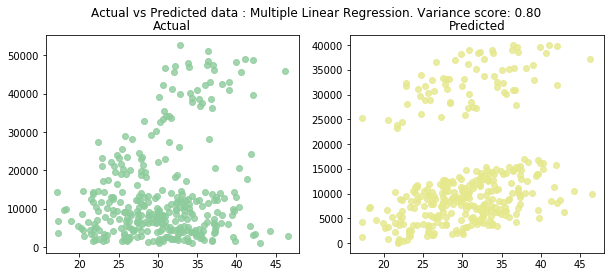

In [36]:
two_d_compare(X_test['bmi'],y_test,y_pred_mlr,model_name)